In [ ]:
import geopandas as gpd

# Caminho para o seu arquivo KML
kml_file_path = r'C:\Users\elome\OneDrive\Desktop\python_projects\mapas\ext_mapas\doc.kml'  # Caminho do arquivo, o r' elimina o problema do windows com \

# Carrega o arquivo KML em um GeoDataFrame
gdf = gpd.read_file(kml_file_path, driver='KML')

# Exibe as primeiras linhas do GeoDataFrame
print(gdf.head())

In [3]:
import pandas as pd
from shapely.geometry import Point

# Localidades em que foram realizadas as pesquisas
data = {
    'Nome': ['Escola Municipal Padre Joaquim De Souza Silva (PJSS)', 'Escola Municipal Professor Ricardo Braz Gomes Barreto (PRBGB)', 'Escola Municipal Machado de Assis (MA)', 'Escola Municipal Professor Hilton Rocha (PHR)'],
    'Longitude': [-44.0348270,-44.0628240, -44.0414931, -44.1247253],
    'Latitude': [-19.9148696,-19.9166208, -19.9656127, -19.9279056]
}

# Cria um DataFrame
points_df = pd.DataFrame(data)

# Converte para GeoDataFrame
geometry = [Point(xy) for xy in zip(points_df['Longitude'], points_df['Latitude'])]
gdf_points = gpd.GeoDataFrame(points_df, geometry=geometry)

<Figure size 2000x1500 with 0 Axes>

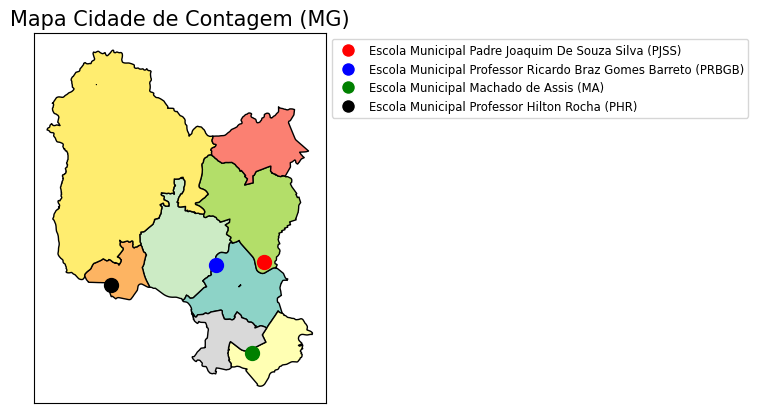

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Configura o tamanho da figura
plt.figure(figsize=(20, 15)) 

# Plota o GeoDataFrame do KML
gdf.plot(column='Name',  # Coluna utilizada para colorir o mapa
          cmap='Set3',  # Paleta de cores
          legend=False,  # Desliga a legenda padrão
          edgecolor='black')  # Cor das bordas das regiões

# Definindo uma lista de cores
colors = ['red', 'blue', 'green', 'black', 'purple', 'cyan', 'magenta']  # Adicione mais cores conforme necessário

# Cria um dicionário para mapear os nomes aos índices de cores
color_map = {name: colors[i % len(colors)] for i, name in enumerate(gdf_points['Nome'])}

# Plota os pontos com cores diferentes
for (x, y, label) in zip(gdf_points.geometry.x, gdf_points.geometry.y, gdf_points['Nome']):
    plt.scatter(x, y, color=color_map[label], marker='o', s=100)  # Tamanho dos pontos ajustado

# Adiciona título
plt.title('Mapa Cidade de Contagem (MG)', fontsize=15)

# Desliga a grade e remove os rótulos dos eixos
plt.grid(False)  # Desliga a grade
plt.xticks([])   # Remove os rótulos do eixo x
plt.yticks([])   # Remove os rótulos do eixo y

# Adiciona a legenda fora do mapa
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label,
                                  markerfacecolor=color_map[label], markersize=10) 
                    for label in gdf_points['Nome']], 
           loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Mostra o mapa
plt.show()